In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("heart.csv")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


<AxesSubplot:xlabel='sex', ylabel='count'>

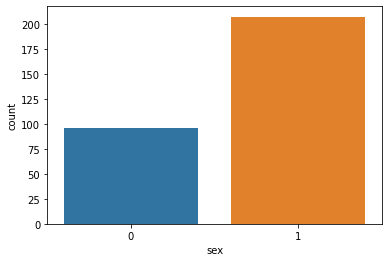

In [3]:
#1 : Male, 0 : Female
sns.countplot(x="sex", data=data)

<AxesSubplot:xlabel='cp', ylabel='count'>

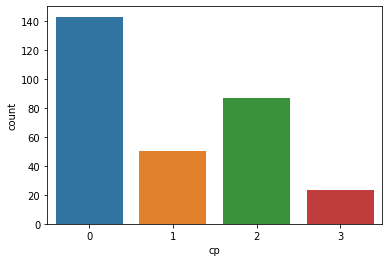

In [4]:
#cp : Chest Pain
sns.countplot(x="cp", data=data)

<AxesSubplot:xlabel='exang', ylabel='count'>

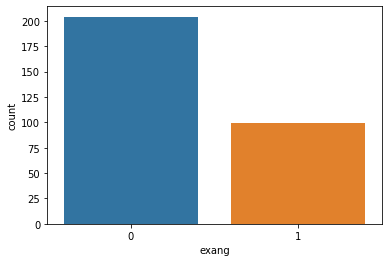

In [5]:
#1 : Yes, 0 : No
sns.countplot(x="exang", data=data)

<AxesSubplot:xlabel='exang', ylabel='count'>

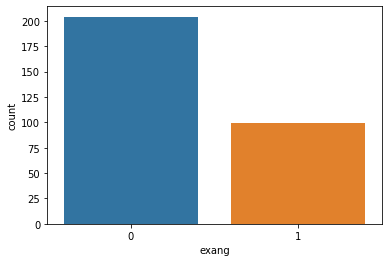

In [6]:
#Exercise Induced Angina
sns.countplot(x="exang", data=data)

<AxesSubplot:xlabel='fbs', ylabel='count'>

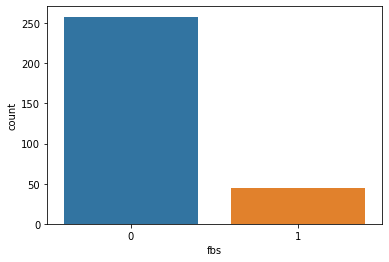

In [7]:
#fbs : Fasting Blood Pressure
sns.countplot(x="fbs", data=data)

<AxesSubplot:xlabel='restecg', ylabel='count'>

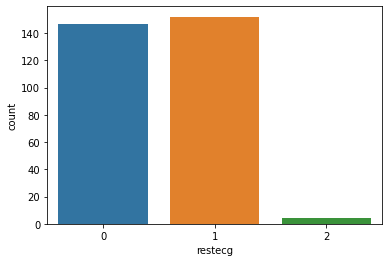

In [8]:
#restecg : Resting Electrocardiographic Results
sns.countplot(x="restecg", data=data)

<AxesSubplot:xlabel='fbs', ylabel='exang'>

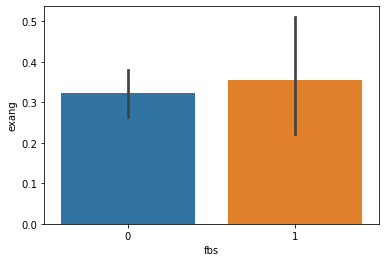

In [9]:
#fbs : Fasting Blood Pressure, exang : Exercise Induced Angina
sns.barplot(x="fbs", y="exang", data=data)

In [10]:
# Finding the Null values
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

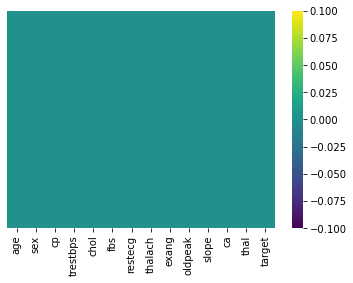

In [23]:
sns.heatmap(data.isnull(), yticklabels=False, cmap="viridis")

In [12]:
#Statistical measures about the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
#Checking the distribution of Target Variables
data['target'].value_counts()
#1 = Defective Heart
#0 = Healthy Heart

1    165
0    138
Name: target, dtype: int64

In [14]:
#Splitting the features and Target
x = data.drop(columns = 'target', axis = 1)
y = data['target']
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [15]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [21]:
#Splitting the Data into Training Data and Test Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = )
print(x.shape, x_train.shape, x_test.shape)

(303, 13) (242, 13) (61, 13)


In [17]:
#Model Training : Logistic Regression
model = LogisticRegression()
#training the LogisticRegression model with Training Data
model.fit(x_train, y_train)

C:\Users\Mayuresh Jadhav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
#Model Evaluation : Accuracy Score
#Accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print('Accuracy on Training Data: ', training_data_accuracy)

Accuracy on Training Data:  0.8512396694214877


In [19]:
#Accuracy on Test Data
x_test_prediction = model.predict(x_test)
test_data_accuracy =  accuracy_score(x_test_prediction, y_test)
print('Accuracy on Test Data: ', test_data_accuracy)

Accuracy on Test Data:  0.819672131147541


In [20]:
#Building a Predictive System
input_data = (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
    print('The Person does not have a heart disease')
else:
    print('The person has heart disease')

[0]
The Person does not have a heart disease
